In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# 1. Load Dataset
def load_dataset(file_path):
    """
    Load the dataset and process it into a DataFrame.
    Assumes the dataset is in the format: ID ::: Title ::: Genre ::: Plot
    """
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                data.append(parts)
    df = pd.DataFrame(data, columns=['ID', 'Title', 'Genre', 'Plot'])
    return df

# File path to the dataset
train_data_path = "D:/Genre Classification Dataset/train_data.txt"  # Update this path with the actual file location
df = load_dataset(train_data_path)

# Display the first few rows
print("Dataset Sample:\n", df.head())

Dataset Sample:
   ID                             Title     Genre  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                                Plot  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  


In [5]:

# 2. Preprocessing: Features and Labels
X = df['Plot']  # Feature: Plot summaries
y = df['Genre']  # Target: Genres

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Train Classifiers
# Logistic Regression
lr_clf = LogisticRegression(max_iter=200, random_state=42)
lr_clf.fit(X_train_tfidf, y_train)


SVC(kernel='linear', random_state=42)

Evaluation Metrics for Logistic Regression:

              precision    recall  f1-score   support

      action       0.31      0.44      0.37       263
       adult       0.42      0.58      0.49       118
   adventure       0.21      0.30      0.25       155
   animation       0.19      0.27      0.22       100
   biography       0.06      0.11      0.08        53
      comedy       0.58      0.52      0.55      1490
       crime       0.14      0.24      0.17       101
 documentary       0.78      0.64      0.70      2619
       drama       0.67      0.45      0.54      2723
      family       0.17      0.29      0.21       157
     fantasy       0.06      0.09      0.07        65
   game-show       0.77      0.69      0.73        39
     history       0.11      0.24      0.15        49
      horror       0.58      0.63      0.60       441
       music       0.45      0.64      0.53       146
     musical       0.12      0.15      0.13        55
     mystery       0.08      0.11   

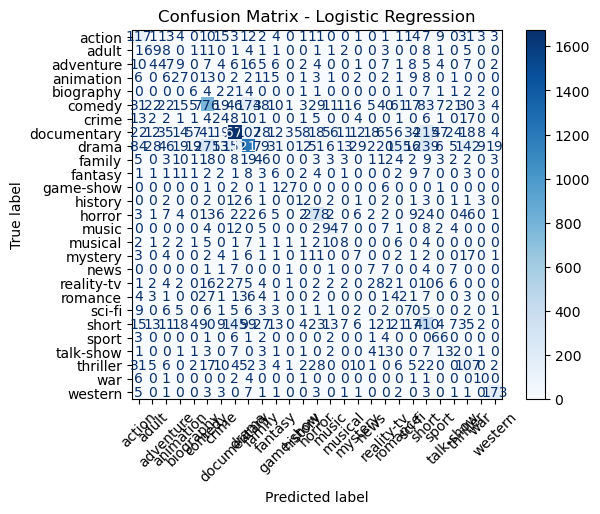

              precision    recall  f1-score   support

      action       0.31      0.44      0.37       263
       adult       0.42      0.58      0.49       118
   adventure       0.21      0.30      0.25       155
   animation       0.19      0.27      0.22       100
   biography       0.06      0.11      0.08        53
      comedy       0.58      0.52      0.55      1490
       crime       0.14      0.24      0.17       101
 documentary       0.78      0.64      0.70      2619
       drama       0.67      0.45      0.54      2723
      family       0.17      0.29      0.21       157
     fantasy       0.06      0.09      0.07        65
   game-show       0.77      0.69      0.73        39
     history       0.11      0.24      0.15        49
      horror       0.58      0.63      0.60       441
       music       0.45      0.64      0.53       146
     musical       0.12      0.15      0.13        55
     mystery       0.08      0.11      0.09        64
        news       0.16    

In [11]:
# 5. Evaluate Models
def evaluate_model(name, model, X_test, y_test):
    """
    Evaluate a model's performance and print classification metrics.
    """
    y_pred = model.predict(X_test)
    print(f"Evaluation Metrics for {name}:\n")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", lr_clf, X_test_tfidf, y_test)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the Logistic Regression Model
lr_clf = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
lr_clf.fit(X_train_tfidf_resampled, y_train_resampled)

# Predict and Evaluate
y_pred = lr_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=1))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Check for missing classes
missing_classes = set(y_test) - set(y_pred)
print("Genres with no predictions:", missing_classes)


# 6. Cross-Validation
def cross_validate_model(name, model, X, y):
    """
    Perform cross-validation and print the average accuracy.
    """
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# Perform cross-validation on Logistic Regression
cross_validate_model("Logistic Regression", lr_clf, X_train_tfidf, y_train)

# 7. Test with Custom Inputs
def predict_genre(plot, model, tfidf_vectorizer):
    """
    Predict the genre of a given plot using a trained model and TF-IDF vectorizer.
    """
    plot_tfidf = tfidf_vectorizer.transform([plot])
    predicted_genre = model.predict(plot_tfidf)
    return predicted_genre[0]
# Test with new examples
custom_plots = [
    "A young boy discovers he has magical powers and attends a school for wizards.",
    "A detective investigates a series of murders in a dark and gritty city.",
    "A group of friends travels to a galaxy far away to fight an evil empire."
]

for plot in custom_plots:
    predicted_genre = predict_genre(plot, lr_clf, tfidf)
    print(f"Plot: {plot}\nPredicted Genre: {predicted_genre}\n")

Evaluation Metrics for Naive Bayes:



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.55      0.06      0.12       263
       adult       0.60      0.05      0.09       118
   adventure       0.75      0.04      0.07       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.51      0.43      0.47      1490
       crime       0.00      0.00      0.00       101
 documentary       0.57      0.89      0.70      2619
       drama       0.46      0.82      0.59      2723
      family       0.00      0.00      0.00       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.18      0.30        39
     history       0.00      0.00      0.00        49
      horror       0.74      0.37      0.49       441
       music       0.74      0.10      0.17       146
     musical       0.00      0.00      0.00        55
     mystery       0.00      0.00      0.00        64
        news       0.00    

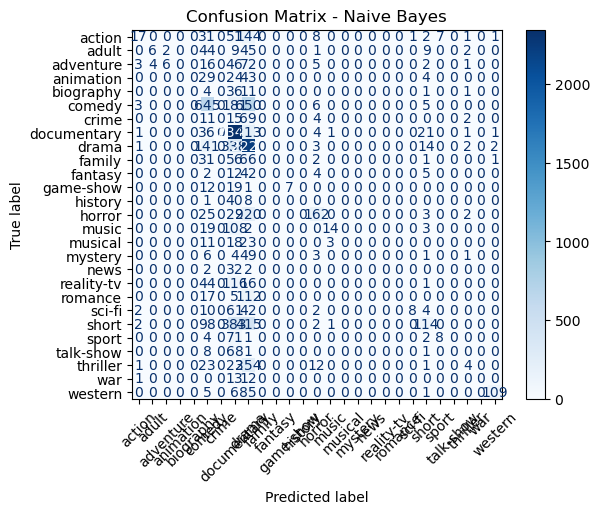

              precision    recall  f1-score   support

      action       0.31      0.44      0.37       263
       adult       0.42      0.58      0.49       118
   adventure       0.21      0.30      0.25       155
   animation       0.19      0.27      0.22       100
   biography       0.06      0.11      0.08        53
      comedy       0.58      0.52      0.55      1490
       crime       0.14      0.24      0.17       101
 documentary       0.78      0.64      0.70      2619
       drama       0.67      0.45      0.54      2723
      family       0.17      0.29      0.21       157
     fantasy       0.06      0.09      0.07        65
   game-show       0.77      0.69      0.73        39
     history       0.11      0.24      0.15        49
      horror       0.58      0.63      0.60       441
       music       0.45      0.64      0.53       146
     musical       0.12      0.15      0.13        55
     mystery       0.08      0.11      0.09        64
        news       0.16    

In [12]:

# Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)


# Evaluate Naive Bayes
evaluate_model("Naive Bayes", nb_clf, X_test_tfidf, y_test)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the Logistic Regression Model
lr_clf = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
lr_clf.fit(X_train_tfidf_resampled, y_train_resampled)

# Predict and Evaluate
y_pred = lr_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=1))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Check for missing classes
missing_classes = set(y_test) - set(y_pred)
print("Genres with no predictions:", missing_classes)


# 6. Cross-Validation
def cross_validate_model(name, model, X, y):
    """
    Perform cross-validation and print the average accuracy.
    """
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# Perform cross-validation on Logistic Regression
cross_validate_model("Logistic Regression", lr_clf, X_train_tfidf, y_train)

# 7. Test with Custom Inputs
def predict_genre(plot, model, tfidf_vectorizer):
    """
    Predict the genre of a given plot using a trained model and TF-IDF vectorizer.
    """
    plot_tfidf = tfidf_vectorizer.transform([plot])
    predicted_genre = model.predict(plot_tfidf)
    return predicted_genre[0]
# Test with new examples
custom_plots = [
    "A young boy discovers he has magical powers and attends a school for wizards.",
    "A detective investigates a series of murders in a dark and gritty city.",
    "A group of friends travels to a galaxy far away to fight an evil empire."
]

for plot in custom_plots:
    predicted_genre = predict_genre(plot, lr_clf, tfidf)
    print(f"Plot: {plot}\nPredicted Genre: {predicted_genre}\n")

Evaluation Metrics for Support Vector Machine:



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.49      0.38      0.43       263
       adult       0.68      0.44      0.53       118
   adventure       0.55      0.19      0.28       155
   animation       0.51      0.20      0.29       100
   biography       0.00      0.00      0.00        53
      comedy       0.50      0.58      0.54      1490
       crime       0.25      0.03      0.05       101
 documentary       0.67      0.84      0.75      2619
       drama       0.55      0.74      0.63      2723
      family       0.47      0.12      0.19       157
     fantasy       0.38      0.05      0.08        65
   game-show       0.92      0.59      0.72        39
     history       0.00      0.00      0.00        49
      horror       0.66      0.59      0.62       441
       music       0.63      0.47      0.54       146
     musical       0.38      0.05      0.10        55
     mystery       0.33      0.02      0.03        64
        news       0.50    

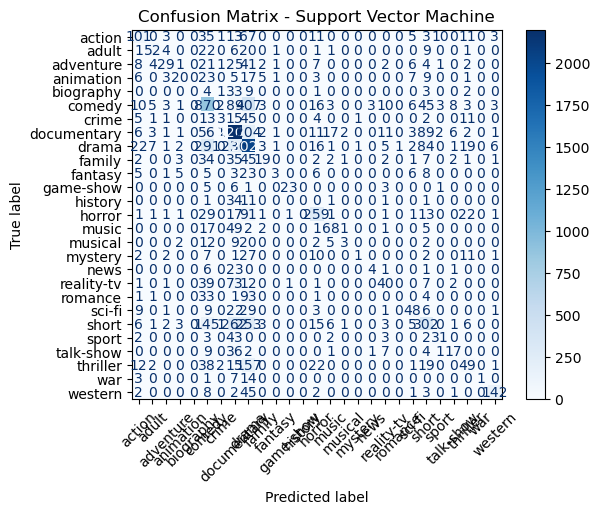

              precision    recall  f1-score   support

      action       0.31      0.44      0.37       263
       adult       0.42      0.58      0.49       118
   adventure       0.21      0.30      0.25       155
   animation       0.19      0.27      0.22       100
   biography       0.06      0.11      0.08        53
      comedy       0.58      0.52      0.55      1490
       crime       0.14      0.24      0.17       101
 documentary       0.78      0.64      0.70      2619
       drama       0.67      0.45      0.54      2723
      family       0.17      0.29      0.21       157
     fantasy       0.06      0.09      0.07        65
   game-show       0.77      0.69      0.73        39
     history       0.11      0.24      0.15        49
      horror       0.58      0.63      0.60       441
       music       0.45      0.64      0.53       146
     musical       0.12      0.15      0.13        55
     mystery       0.08      0.11      0.09        64
        news       0.16    

In [13]:

# Support Vector Machine
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

# Evaluate SVM
evaluate_model("Support Vector Machine", svm_clf, X_test_tfidf, y_test)
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the Logistic Regression Model
lr_clf = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
lr_clf.fit(X_train_tfidf_resampled, y_train_resampled)

# Predict and Evaluate
y_pred = lr_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=1))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Check for missing classes
missing_classes = set(y_test) - set(y_pred)
print("Genres with no predictions:", missing_classes)


# 6. Cross-Validation
def cross_validate_model(name, model, X, y):
    """
    Perform cross-validation and print the average accuracy.
    """
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# Perform cross-validation on Logistic Regression
cross_validate_model("Logistic Regression", lr_clf, X_train_tfidf, y_train)

# 7. Test with Custom Inputs
def predict_genre(plot, model, tfidf_vectorizer):
    """
    Predict the genre of a given plot using a trained model and TF-IDF vectorizer.
    """
    plot_tfidf = tfidf_vectorizer.transform([plot])
    predicted_genre = model.predict(plot_tfidf)
    return predicted_genre[0]
# Test with new examples
custom_plots = [
    "A young boy discovers he has magical powers and attends a school for wizards.",
    "A detective investigates a series of murders in a dark and gritty city.",
    "A group of friends travels to a galaxy far away to fight an evil empire."
]

for plot in custom_plots:
    predicted_genre = predict_genre(plot, lr_clf, tfidf)
    print(f"Plot: {plot}\nPredicted Genre: {predicted_genre}\n")

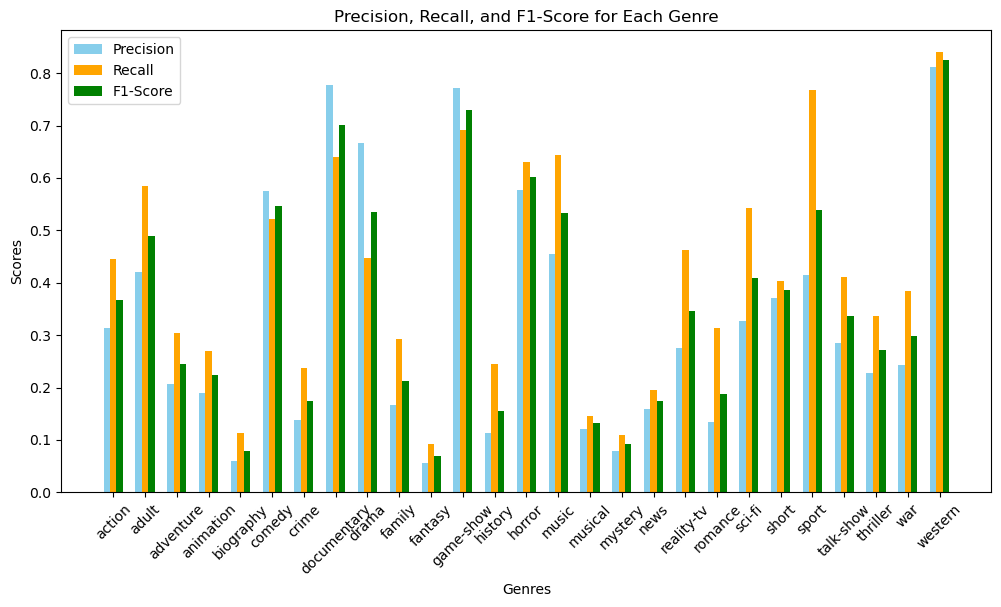

In [14]:
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each genre
classes = list(report.keys())[:-3]  # Ignore 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plot bar charts
x = np.arange(len(classes))  # Number of genres

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='skyblue')
plt.bar(x, recall, width=0.2, label='Recall', color='orange')
plt.bar(x + 0.2, f1_score, width=0.2, label='F1-Score', color='green')
plt.xticks(x, classes, rotation=45)
plt.xlabel('Genres')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score for Each Genre')
plt.legend()
plt.show()


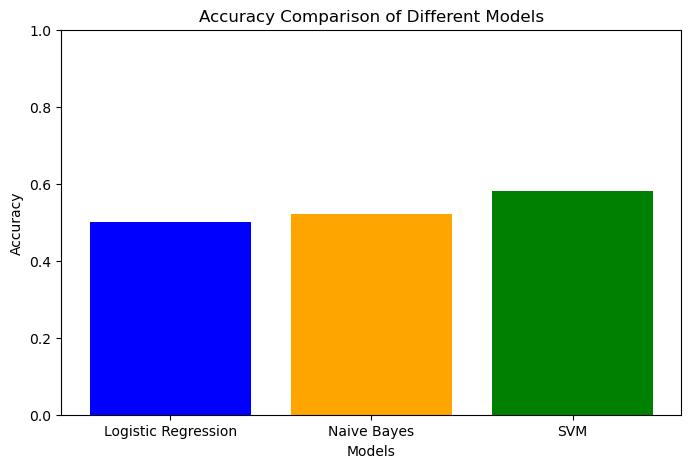

In [15]:
# Compare the accuracy of multiple models
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [accuracy_score(y_test, lr_clf.predict(X_test_tfidf)),
              accuracy_score(y_test, nb_clf.predict(X_test_tfidf)),
              accuracy_score(y_test, svm_clf.predict(X_test_tfidf))]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Scale accuracy between 0 and 1
plt.show()
